## TSB-AD Quick Start

### Run AD Model

In this tutorial, we demonstrate how to (i) load a univariate or multivariate time series from the TSB-AD benchmark, (ii) run an unsupervised anomaly detector, and (iii) evaluate its detection quality using standard measures.

In [8]:
import warnings
warnings.filterwarnings('ignore')

In [9]:
import pandas as pd
from TSB_AD.model_wrapper import run_Unsupervise_AD
from TSB_AD.evaluation.metrics import get_metrics

# Specify Anomaly Detector to use and data directory
AD_Name = 'IForest'   # It can be replaced with any anomaly detector availale in TSB-AD
data_direc = '../Datasets/TSB-AD-U/001_NAB_id_1_Facility_tr_1007_1st_2014.csv'

# Loading Data
df = pd.read_csv(data_direc).dropna()
data = df.iloc[:, 0:-1].values.astype(float)
label = df['Label'].astype(int).to_numpy()

print("Loaded data with shape:", data.shape)
print("Loaded labels with shape:", label.shape)

# Applying Anomaly Detector
output = run_Unsupervise_AD(AD_Name, data)

# Evaluation
evaluation_result = get_metrics(output, label)

print("Evaluation results:\n", evaluation_result)

Loaded data with shape: (4031, 1)
Loaded labels with shape: (4031,)
Evaluation results:
 {'AUC-PR': 0.15269855522128545, 'AUC-ROC': 0.6810639502159712, 'VUS-PR': 0.1847473477766243, 'VUS-ROC': 0.7528825596433526, 'Standard-F1': 0.26405951956918766, 'PA-F1': 0.8542963885429639, 'Event-based-F1': 0.37010676156583594, 'R-based-F1': 0.19703332769196885, 'Affiliation-F': 0.8232591781493652}


### Plot Time Series with Ground Truth Anomalies

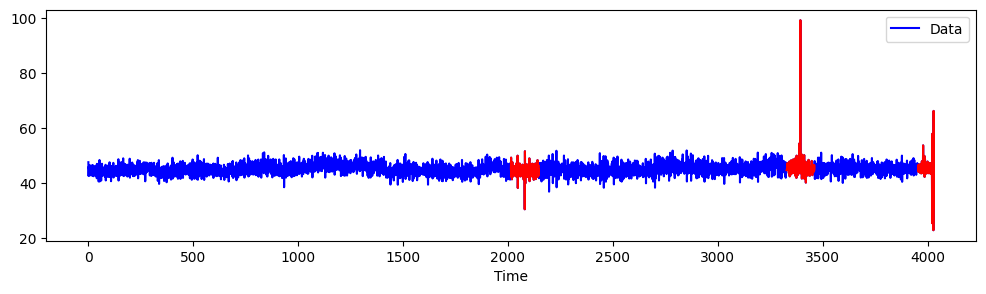

In [11]:
import matplotlib.pyplot as plt
from TSB_AD.evaluation.basic_metrics import basic_metricor

grader = basic_metricor()
range_anomaly = grader.range_convers_new(label)
fig, ax = plt.subplots(figsize=(12, 3))  # Adjust the figure size as needed
ax.plot(range(len(data)), data, color='blue', linewidth=1.5, label='Data')
for r in range_anomaly:
    if r[0] == r[1]:
        ax.plot(r[0], data[r[0]], 'ro', markersize=10)
    else:
        ax.plot(range(r[0], r[1] + 1), data[r[0]:r[1] + 1], color='red', linewidth=1.5) 
plt.legend()
plt.xlabel('Time')
plt.show()